# Polynomial Regeression and Learning Curves

## Import Libraries

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve

In [16]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "training_linear_models"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Create Data

In [2]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) -3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m,1) 

## Plot the data

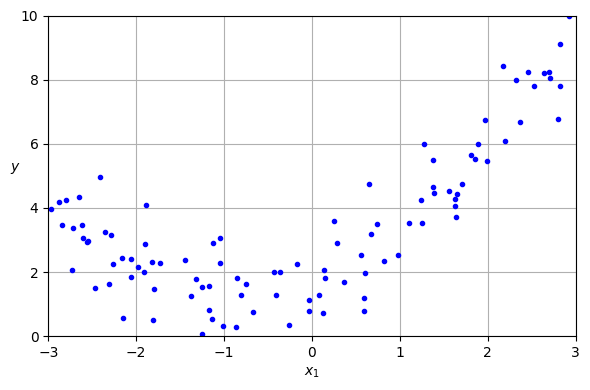

In [17]:
plt.figure(figsize = (6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation = 0)
plt.axis([-3,3,0,10])
save_fig("quadratic_data_plot")
plt.grid()

In [11]:
poly_features = PolynomialFeatures(degree= 2, include_bias = False)
X_poly = poly_features.fit_transform(X)

X[0], X_poly[0]

(array([-0.75275929]), array([-0.75275929,  0.56664654]))

In [13]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

In [15]:
X_new = np.linspace(-3 , 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

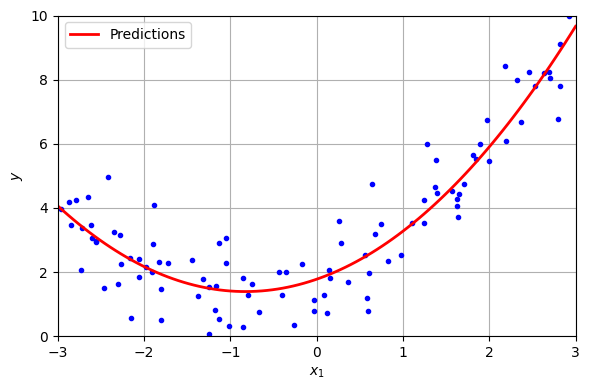

In [22]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth =2, label = "Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$")
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()
save_fig("quadratic_predictions_plot")

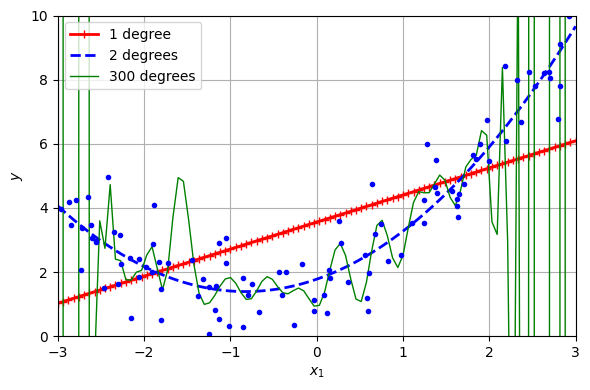

In [34]:
plt.figure(figsize =(6, 4))

for style, width, degree in (("r-+", 2, 1), ("b--", 2, 2), ("g-", 1, 300)):
    polybig_features = PolynomialFeatures(degree = degree, include_bias = False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = make_pipeline(polybig_features, std_scaler, lin_reg)
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    label = f"{degree} degree{'s' if degree > 1 else ''}"
    plt.plot(X_new, y_newbig, style,  label = label, linewidth = width)

plt.plot(X, y, "b.", linewidth = 3)
plt.legend(loc = "upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$")
plt.axis([-3, 3, 0, 10])
plt.grid()
save_fig("high_degree_polynomials_plot")

## Learning Curves

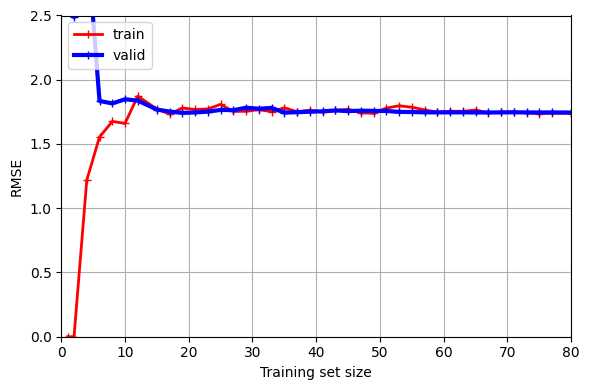

In [44]:
train_size, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=  np.linspace(0.01, 1.0, 40), cv = 5,
    scoring = "neg_root_mean_squared_error" )

train_error = -train_scores.mean(axis = 1)
valid_error = -valid_scores.mean(axis = 1)

plt.figure(figsize = (6,4))
plt.plot(train_size, train_error, "r-+", linewidth = 2, label = "train")
plt.plot(train_size, valid_error, "b-+", linewidth = 3, label = "valid")

plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc = 'upper left')
plt.axis([0, 80, 0, 2.5])

save_fig("underfitting_learning_curves_plot")

In [45]:
polynomial_regression = make_pipeline(
    PolynomialFeatures(degree = 10, include_bias= False),
    LinearRegression())

train_size, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring = "neg_root_mean_squared_error")

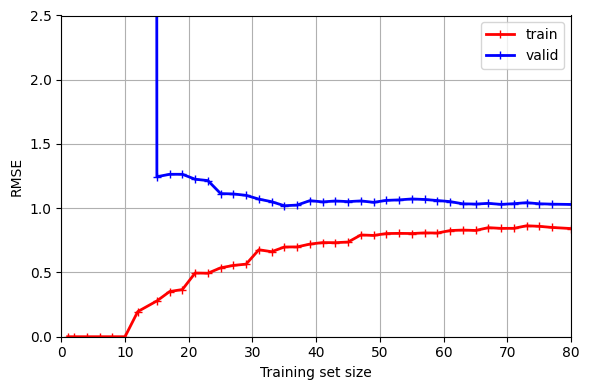

In [46]:
train_error = -train_scores.mean(axis = 1)
valid_error = -valid_scores.mean(axis = 1)

plt.figure(figsize=(6,4))
plt.plot(train_size, train_error, "r-+", linewidth = 2, label = "train")
plt.plot(train_size, valid_error, "b-+", linewidth = 2, label = "valid")
plt.legend(loc = 'upper right')
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.axis([0, 80, 0, 2.5])
save_fig("learning_curves_plot")